In [53]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
db_path = "financial_data.db"
conn = sqlite3.connect(db_path)

# Indicators and Groups
indicators = ['ICLN', 'PBW', 'TAN', 'XLE', 'VDE', 'SPY', 'QQQ', 'VIX', 'EEM', 'LIT', 'URA', 'HYG', 'EURUSD=X', 'GBPUSD=X']
commodities = ['CL=F', 'NG=F', 'DXY', 'GC=F', 'SI=F']  # Crude oil, natural gas, USD index, gold, silver
macro_indicators = ['^IRX', '^TNX', '^TYX', 'MSCI', '^FTSE', '^N225', 'BTC-USD', 'ETH-USD']

In [54]:
# Step 2: Fetch data for calculations
query = """
    SELECT Date, Asset, Close, Daily_Range, Normalized_Range, EMA_7, EMA_30, Bollinger_Upper, Bollinger_Lower
    FROM solar_data
"""
df = pd.read_sql(query, conn)

In [43]:
df.head()

,Date,Asset,Close,Daily_Range,Normalized_Range,EMA_7,EMA_30,Bollinger_Upper,Bollinger_Lower
0,2015-03-27,FSLR,59.610001,1.299999,0.021808,60.257839,58.021932,67.327261,48.529406
1,2015-03-30,FSLR,60.689999,1.329998,0.021915,60.365879,58.194065,67.118411,49.528256
2,2015-03-31,FSLR,59.790001,1.270000,0.021241,60.221909,58.297029,66.830966,50.493701
3,2015-04-01,FSLR,60.830002,2.300003,0.037810,60.373932,58.460446,66.369966,51.754035
4,2015-04-02,FSLR,61.189999,1.170002,0.019121,60.577949,58.636546,65.622303,53.353698


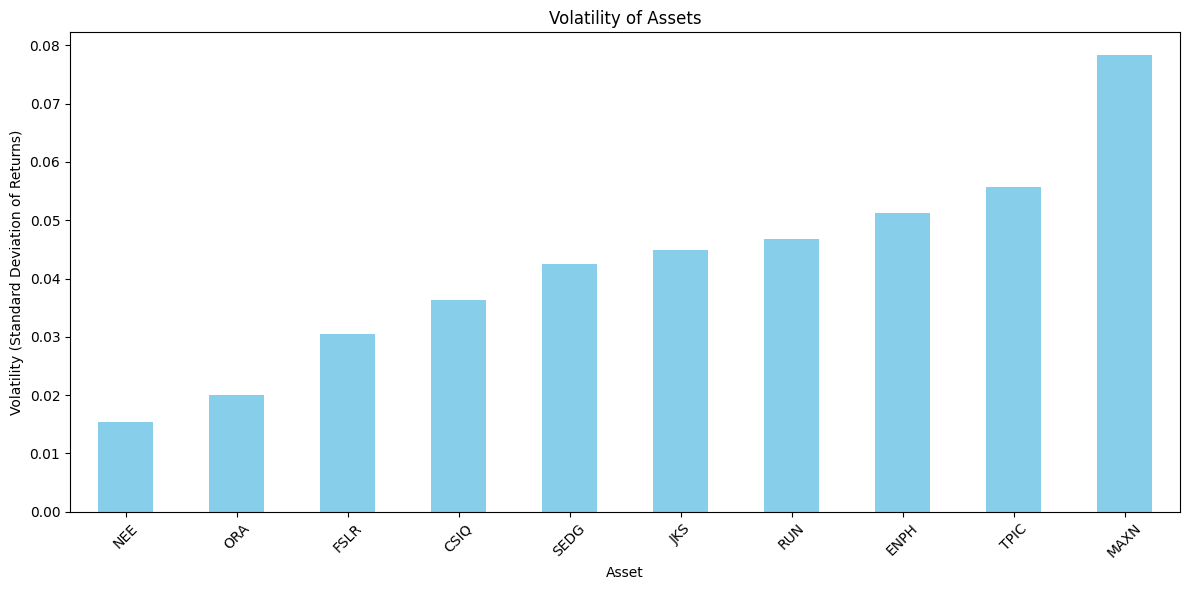

In [44]:
# Step 3: Calculate daily returns and volatility
returns = df.pivot(index='Date', columns='Asset', values='Close').pct_change()
volatility = returns.std()

# Step 4: Plot volatility as a bar chart
plt.figure(figsize=(12, 6))
volatility.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Assets')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.xlabel('Asset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Step 5: Select assets based on volatility
most_volatile = "MAXN"  # Most volatile
least_volatile = "NEE"  # Least volatile
medium_volatility = volatility.sort_values().index[len(volatility) // 2]  # Medium volatility

selected_assets = [most_volatile, least_volatile, medium_volatility]

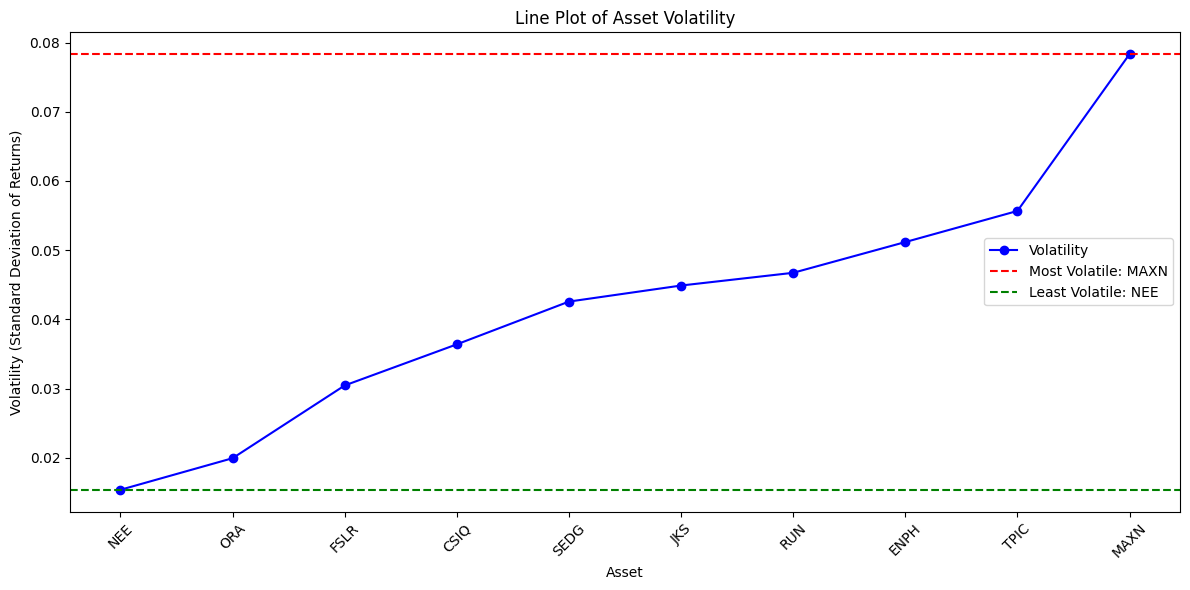

In [46]:
# Step 6: Line plot showing volatility
plt.figure(figsize=(12, 6))
plt.plot(volatility.sort_values(), marker='o', linestyle='-', color='blue', label='Volatility')
plt.axhline(volatility[most_volatile], color='red', linestyle='--', label=f'Most Volatile: {most_volatile}')
plt.axhline(volatility[least_volatile], color='green', linestyle='--', label=f'Least Volatile: {least_volatile}')
plt.title('Line Plot of Asset Volatility')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.xlabel('Asset')
plt.xticks(ticks=range(len(volatility.sort_values())), labels=volatility.sort_values().index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
# Step 7: Generate correlation matrices for selected assets
def fetch_asset_data(asset):
    query = f"""
        SELECT Date, Close, Daily_Range, Normalized_Range, EMA_7, EMA_30, Bollinger_Upper, Bollinger_Lower
        FROM solar_data
        WHERE Asset = '{asset}'
    """
    return pd.read_sql(query, conn)

In [48]:
def plot_correlation_matrix(data, title):
    corr = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

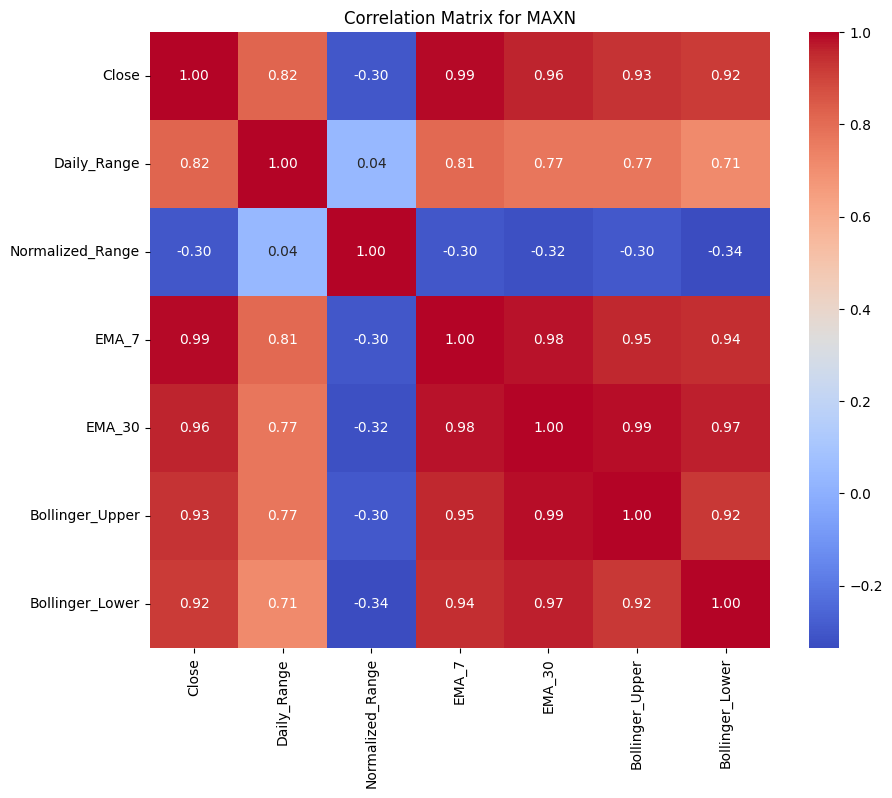

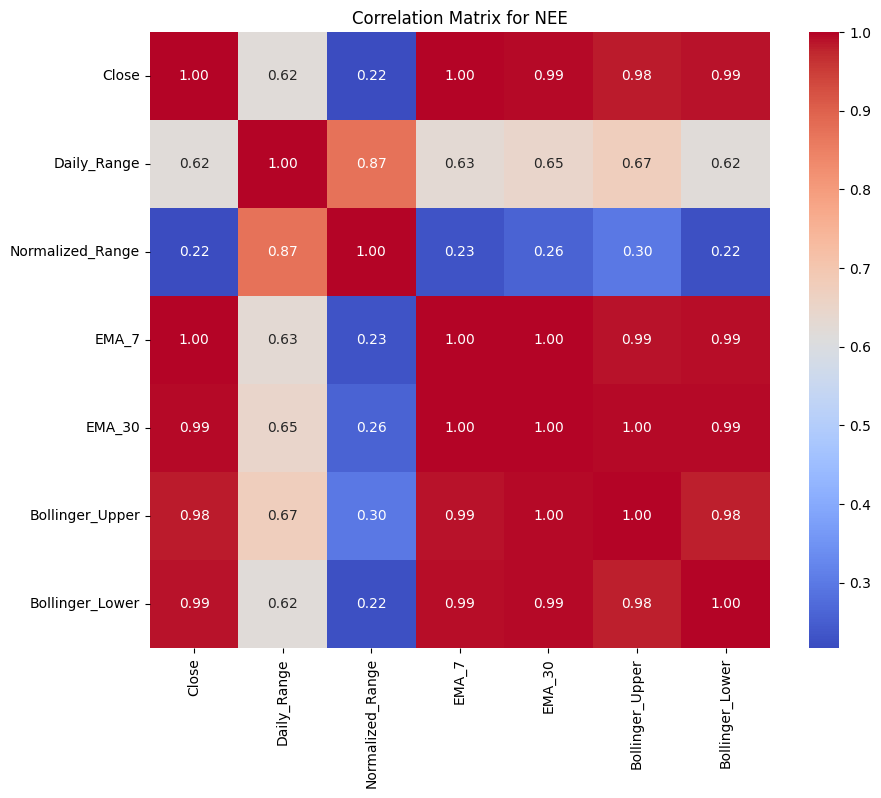

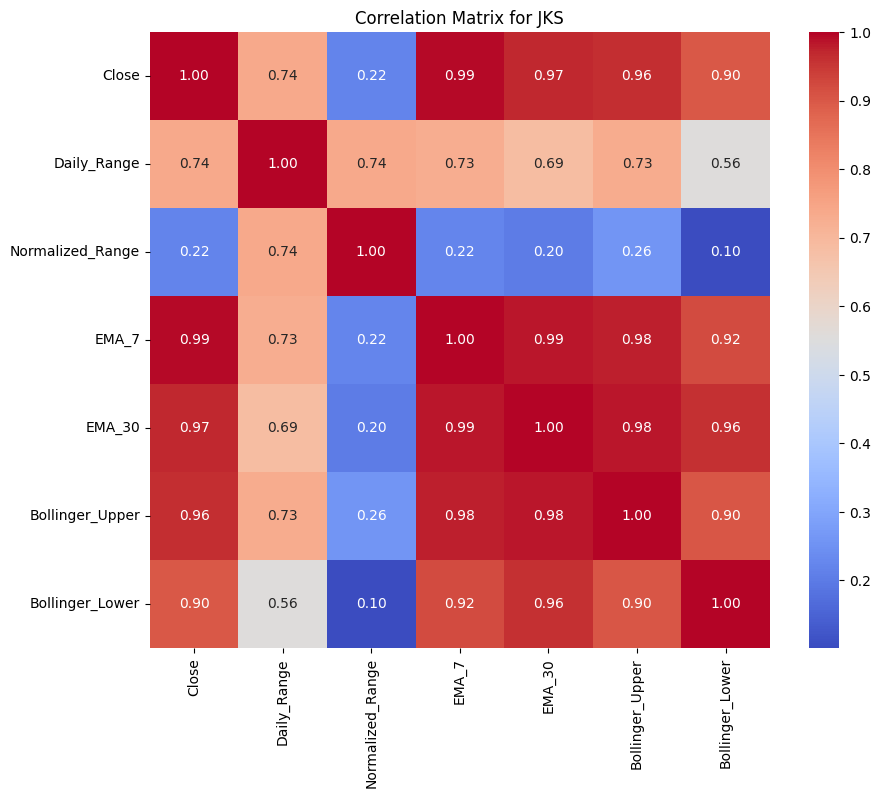

In [49]:
for asset in selected_assets:
    asset_data = fetch_asset_data(asset)
    plot_correlation_matrix(asset_data.drop(columns=['Date']), f'Correlation Matrix for {asset}')

In [62]:
!pip install ace-tools


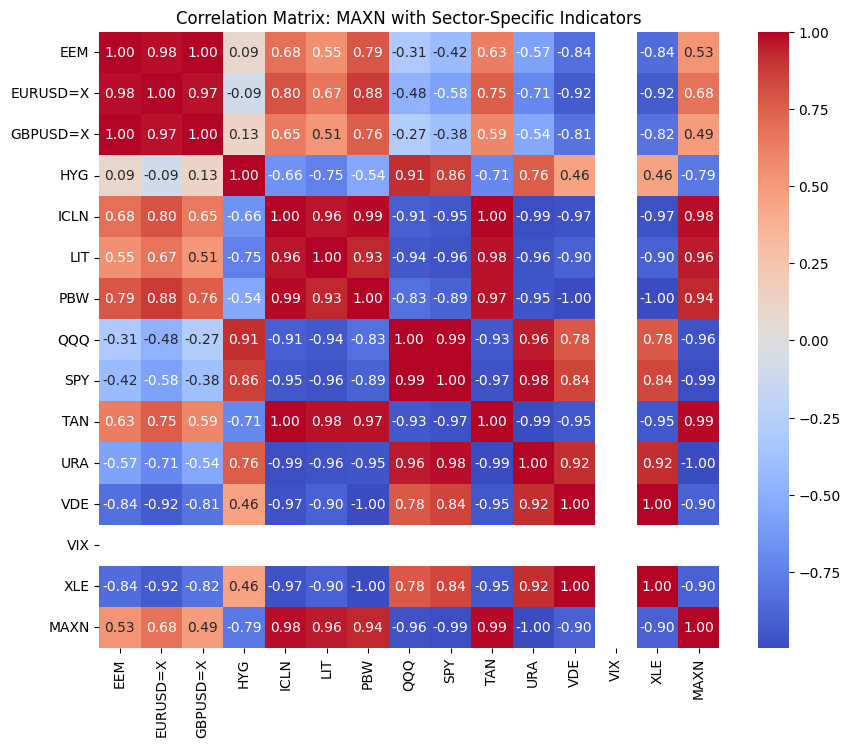

Correlation table saved: correlation_table_MAXN_Sector-Specific_Indicators.csv


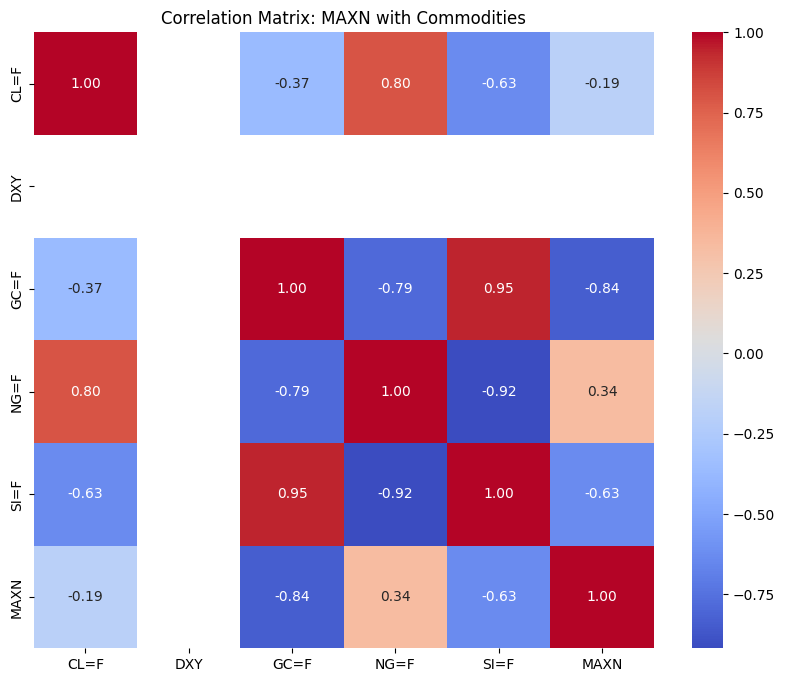

Correlation table saved: correlation_table_MAXN_Commodities.csv


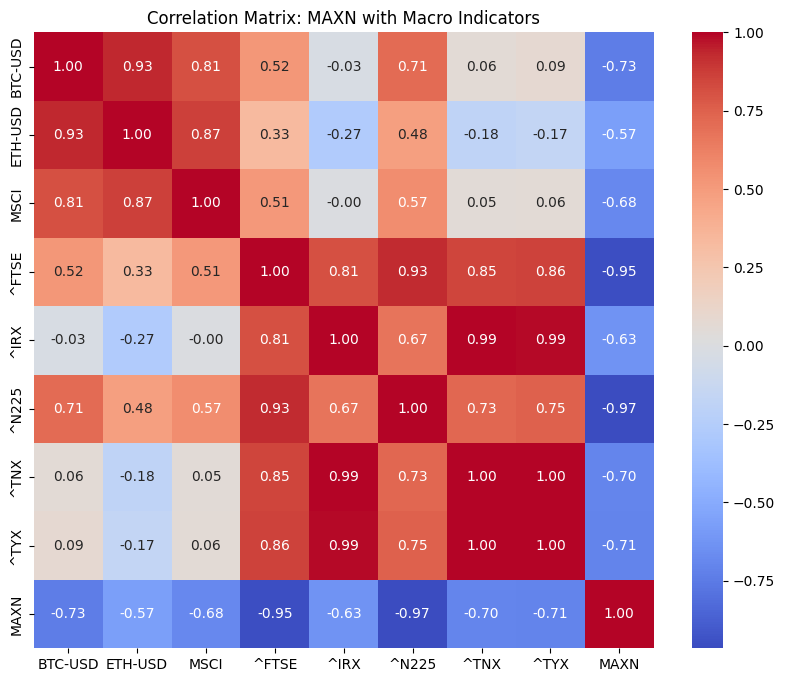

Correlation table saved: correlation_table_MAXN_Macro_Indicators.csv


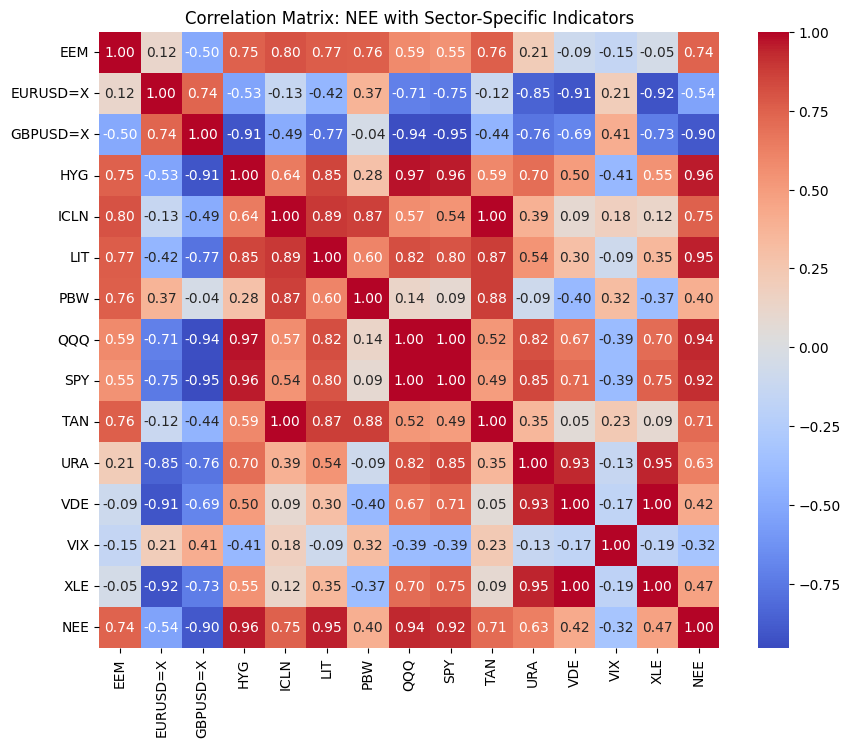

Correlation table saved: correlation_table_NEE_Sector-Specific_Indicators.csv


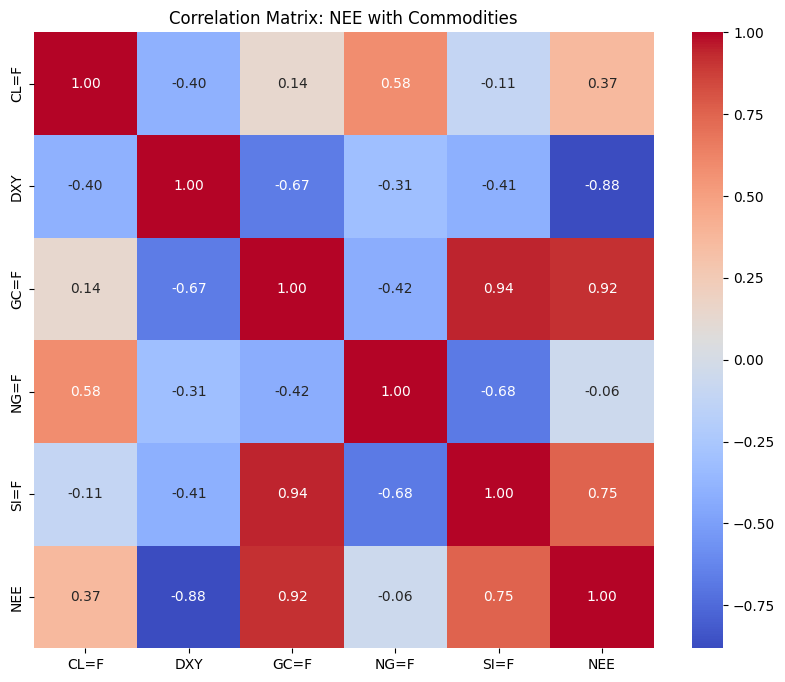

Correlation table saved: correlation_table_NEE_Commodities.csv


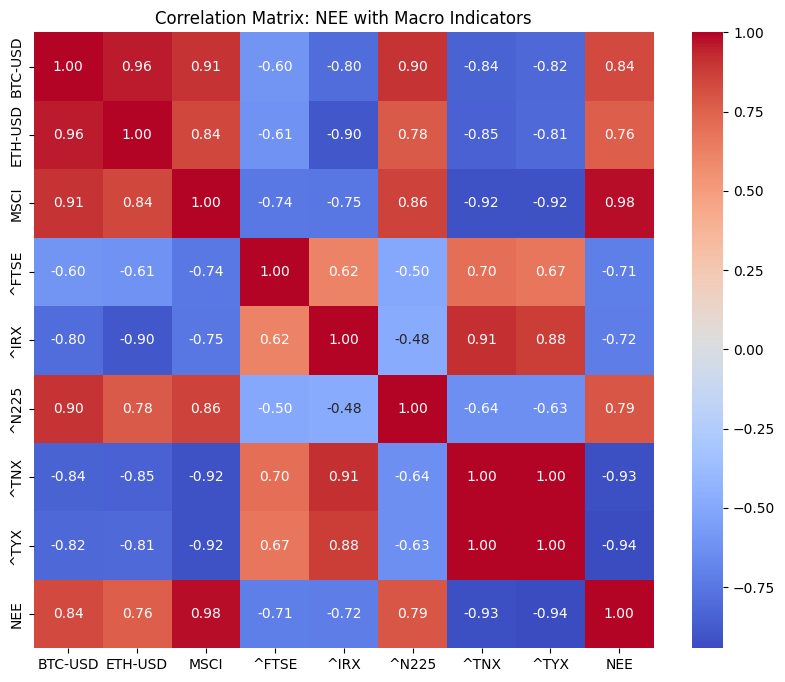

Correlation table saved: correlation_table_NEE_Macro_Indicators.csv


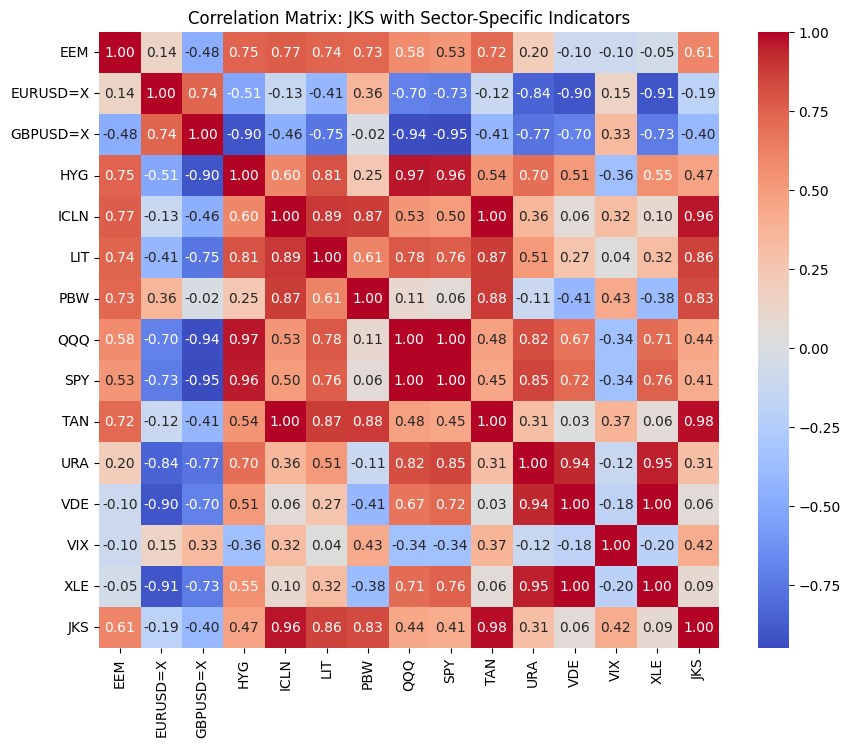

Correlation table saved: correlation_table_JKS_Sector-Specific_Indicators.csv


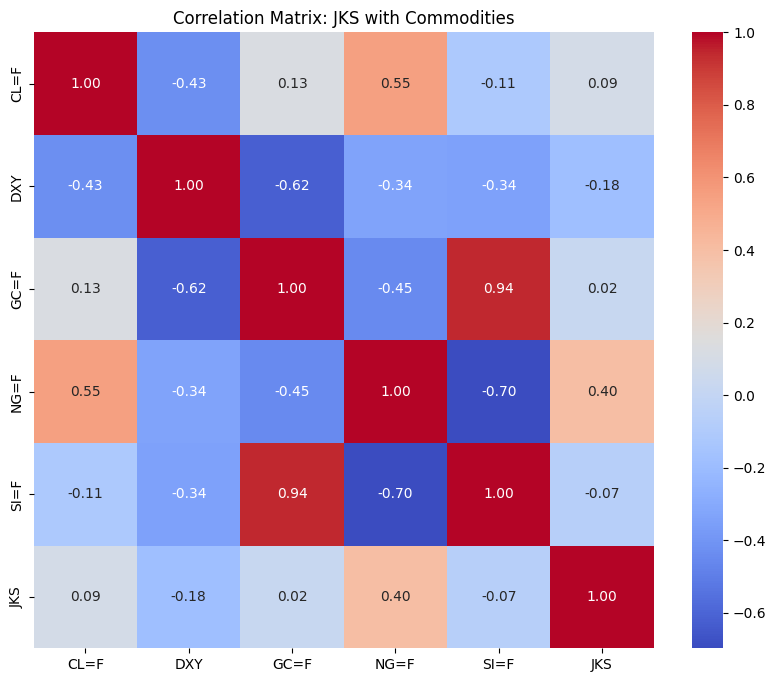

Correlation table saved: correlation_table_JKS_Commodities.csv


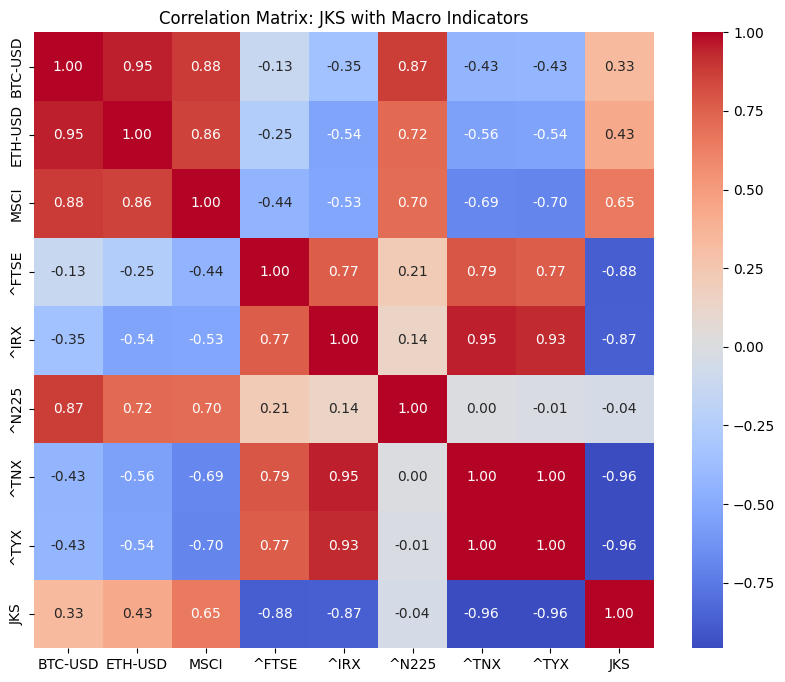

Correlation table saved: correlation_table_JKS_Macro_Indicators.csv
Full correlation table saved: full_correlation_table.csv
Displaying Full Correlation Table:
Asset      CSIQ      ENPH      FSLR       JKS      MAXN       NEE       ORA  \
Asset                                                                         
CSIQ   1.000000  0.475570  0.609270  0.723310  0.486706  0.255427  0.372817   
ENPH   0.475570  1.000000  0.441416  0.417327  0.450644  0.227054  0.294390   
FSLR   0.609270  0.441416  1.000000  0.511221  0.454398  0.274278  0.364921   
JKS    0.723310  0.417327  0.511221  1.000000  0.407148  0.196999  0.335673   
MAXN   0.486706  0.450644  0.454398  0.407148  1.000000  0.184896  0.321984   
NEE    0.255427  0.227054  0.274278  0.196999  0.184896  1.000000  0.411383   
ORA    0.372817  0.294390  0.364921  0.335673  0.321984  0.411383  1.000000   
RUN    0.538322  0.516392  0.505965  0.455391  0.489893  0.327515  0.387871   
SEDG   0.538184  0.556466  0.500092  0.471764  0.4

In [70]:
# Step 6: Correlation matrices by groups and table creation
def correlation_with_group(asset, group, group_name):
    asset_data_query = f"""
        SELECT Date, Close
        FROM solar_data
        WHERE Asset = '{asset}'
    """
    asset_data = pd.read_sql(asset_data_query, conn).rename(columns={'Close': asset})

    # Fetch group data
    group_placeholders = ', '.join([f"'{x}'" for x in group])
    query_group = f"""
        SELECT Date, Asset, Close
        FROM indicators_data
        WHERE Asset IN ({group_placeholders})
    """
    group_data = pd.read_sql(query_group, conn)

    # Pivot group data to have Assets as columns
    group_pivot = group_data.pivot(index='Date', columns='Asset', values='Close').reset_index()

    # Merge the asset data with group data
    merged_data = pd.merge(group_pivot, asset_data, on='Date', how='inner')

    # Generate the correlation matrix
    corr_matrix = merged_data.set_index('Date').corr()

    # Plot the correlation matrix
    plot_correlation_matrix(corr_matrix, f'Correlation Matrix: {asset} with {group_name}')

    # Save correlation matrix as a table
    save_correlation_table(corr_matrix, asset, group_name)

# Save correlation matrix to a CSV file
def save_correlation_table(corr_matrix, asset, group_name):
    file_name = f"correlation_table_{asset}_{group_name.replace(' ', '_')}.csv"
    corr_matrix.to_csv(file_name)
    print(f"Correlation table saved: {file_name}")

# Generate correlation matrices and tables for each selected asset and group
for asset in selected_assets:
    correlation_with_group(asset, indicators, 'Sector-Specific Indicators')
    correlation_with_group(asset, commodities, 'Commodities')
    correlation_with_group(asset, macro_indicators, 'Macro Indicators')

# Create and view full correlation table for all assets
all_corr_matrix = returns.corr()
all_corr_matrix_file = "full_correlation_table.csv"
all_corr_matrix.to_csv(all_corr_matrix_file)
print(f"Full correlation table saved: {all_corr_matrix_file}")

# Display the full correlation matrix
def display_dataframe_to_user(name, dataframe):
    print(f"Displaying {name}:")
    print(dataframe)

display_dataframe_to_user(name="Full Correlation Table", dataframe=all_corr_matrix)

# Close the connection
conn.close()

# Utility function for plotting correlation matrices
def plot_correlation_matrix(corr, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()



In [55]:
# Step 7: Industry-wide indices data
query_indicators = """
    SELECT *
    FROM indicators_data
"""
indicators_data = pd.read_sql(query_indicators, conn)


In [57]:
indicators_data.head()

,Date,Close,High,Low,Open,Volume,Asset,Type
0,2015-01-02,8.124761,8.199759,8.033097,8.199759,52200.0,ICLN,Indicator
1,2015-01-05,7.949766,8.166426,7.891434,8.166426,34500.0,ICLN,Indicator
2,2015-01-06,7.933097,8.033094,7.874765,7.999761,18100.0,ICLN,Indicator
3,2015-01-07,8.008096,8.058095,7.933099,7.933099,221700.0,ICLN,Indicator
4,2015-01-08,8.199759,8.208093,8.058097,8.058097,61900.0,ICLN,Indicator


In [58]:
# Step 9: Correlation Matrices for Indicator Groups
def group_correlation_matrix(data, columns, title):
    filtered_data = data[data['Asset'].isin(columns)]  # Filter rows based on Asset
    pivoted_data = filtered_data.pivot(index='Date', columns='Asset', values='Close')  # Pivot for correlation
    plot_correlation_matrix(pivoted_data, title)

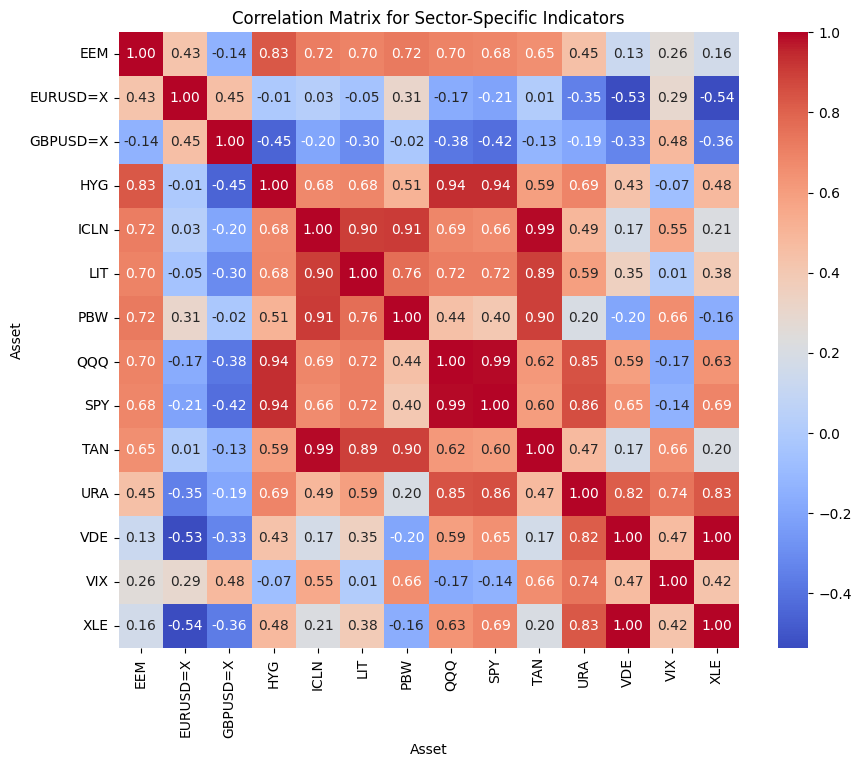

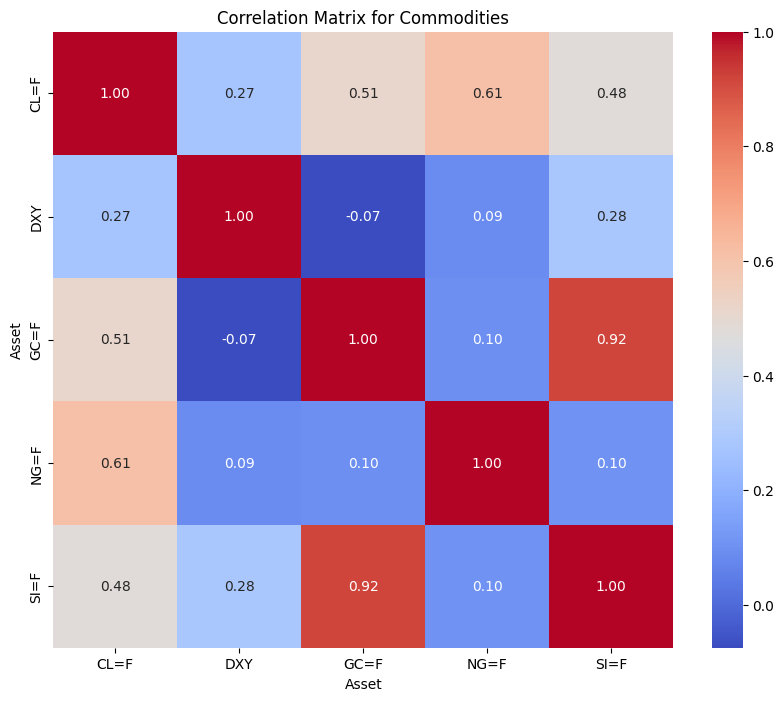

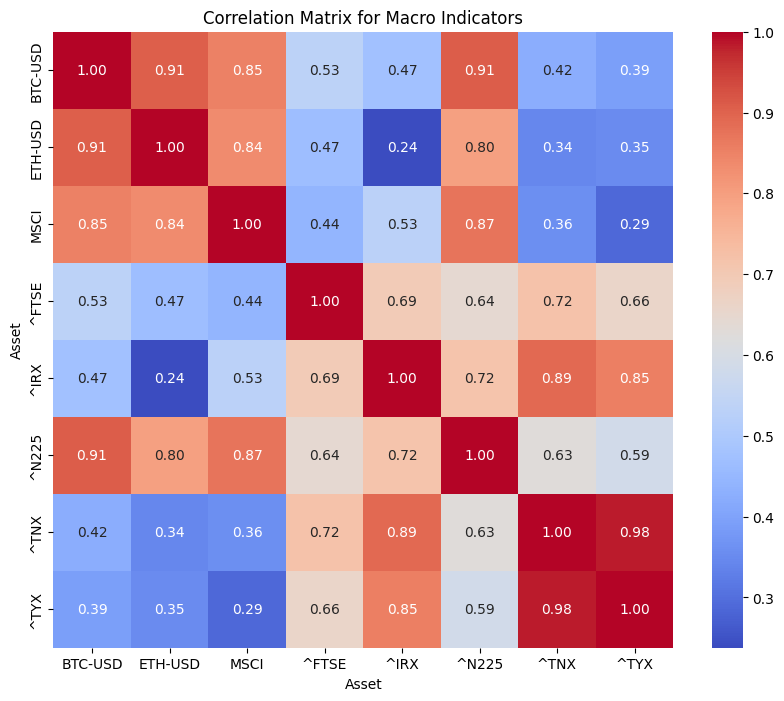

In [59]:
# Generate correlation matrices for groups
group_correlation_matrix(indicators_data, indicators, 'Correlation Matrix for Sector-Specific Indicators')
group_correlation_matrix(indicators_data, commodities, 'Correlation Matrix for Commodities')
group_correlation_matrix(indicators_data, macro_indicators, 'Correlation Matrix for Macro Indicators')